# OSMI Mental Health in Tech Survey

*Supervised Learning*

CS7641 - Machine Learning

Kamolphan Liwprasert (kliwprasert3@gatech.edu)

GTID: 903457032


# Dataset Information
https://www.kaggle.com/osmi/mental-health-in-tech-survey

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the ongoing 2016 survey found here.

## Content

This dataset contains the following data:

    Timestamp

    Age

    Gender

    Country

    state: If you live in the United States, which state or territory do you live in?

    self_employed: Are you self-employed?

    family_history: Do you have a family history of mental illness?

    treatment: Have you sought treatment for a mental health condition?

    work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

    no_employees: How many employees does your company or organization have?

    remote_work: Do you work remotely (outside of an office) at least 50% of the time?

    tech_company: Is your employer primarily a tech company/organization?

    benefits: Does your employer provide mental health benefits?

    care_options: Do you know the options for mental health care your employer provides?

    wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

    seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

    anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

    leave: How easy is it for you to take medical leave for a mental health condition?

    mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

    physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

    coworkers: Would you be willing to discuss a mental health issue with your coworkers?

    supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

    mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

    physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

    mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

    obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

    comments: Any additional notes or comments

### Inspiration

Some questions worth exploring:

    How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
    What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?

### Acknowledgements

The original dataset is from Open Sourcing Mental Illness and can be downloaded here. https://osmihelp.org/research

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Plot customization
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-colorblind')

In [3]:
data = pd.read_csv('datasets_311_673_survey.csv')

print("Dataset Shape: ", data.shape)
data.head()

Dataset Shape:  (1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# EDA

In [4]:
# Plots directory
import os

if not os.path.exists('mental_plots'):
    os.makedirs('mental_plots')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [7]:
data.isnull().any()
# no data to impute 

Timestamp                    False
Age                          False
Gender                       False
Country                      False
state                         True
self_employed                 True
family_history               False
treatment                    False
work_interfere                True
no_employees                 False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
leave                        False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
mental_health_interview      False
phys_health_interview        False
mental_vs_physical           False
obs_consequence              False
comments                      True
dtype: bool

In [8]:
data['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

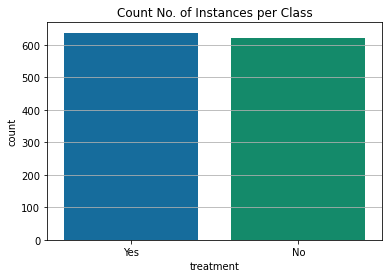

In [9]:
ax = sns.countplot(data['treatment'])
ax.set_title('Count No. of Instances per Class')
plt.savefig('mental_plots/count_class.png')

### Drop Unneccessary Columns

In [11]:
# Timestamps are all unique values
data = data.drop(['Timestamp'], axis= 1)

# Comments are optional free text field.
# There are only 164 comments and may not all related to the dataset
data = data.drop(['comments'], axis= 1)

# There are a lot of missing values in state. 
# This field can be ignore if not take the locations into account.
data = data.drop(['state'], axis= 1)

In [12]:
# Remaining missing values
data.isnull().sum().max()

264

## Data Cleaning

#### Cleaning NaN values

In [17]:
default_int = 0
default_string = 'NaN'
default_float = 0.0

data['Age'].fillna(default_int)

for feature in ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']:
    data[feature] = data[feature].fillna(default_string)

In [16]:
data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


#### Unified values

In [25]:
print("Len(): ", len(data['Gender'].str.lower().unique()))
data['Gender'].str.lower().unique()

Len():  43


array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [26]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

In [27]:
for (row, col) in data.iterrows():
    if str.lower(col.Gender) in male_str:
        data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)
    if str.lower(col.Gender) in female_str:
        data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
    if str.lower(col.Gender) in trans_str:
        data['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

# Remove outlier that's not useful
stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

print(data['Gender'].unique())

['female' 'male' 'trans']


In [31]:
# Impute missing age with median

data['Age'].fillna(data['Age'].median(), inplace = True)

# Filling outlier ages with median

s = pd.Series(data['Age'])
s[s < 18] = data['Age'].median()
data['Age'] = s
s = pd.Series(data['Age'])
s[s > 120] = data['Age'].median()
data['Age'] = s

In [32]:
# Add column age_range
data['age_range'] = pd.cut(data['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

class   acc  good  unacc  vgood
buying                         
high    108     0    324      0
low      89    46    258     39
med     115    23    268     26
vhigh    72     0    360      0


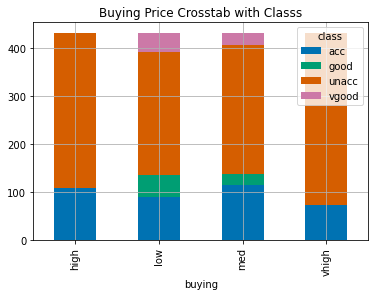

In [9]:
ct = pd.crosstab(data['buying'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Buying Price Crosstab with Classs')
plt.savefig('mental_plots/crosstab_buying.png')

class  acc  good  unacc  vgood
maint                         
high   105     0    314     13
low     92    46    268     26
med    115    23    268     26
vhigh   72     0    360      0


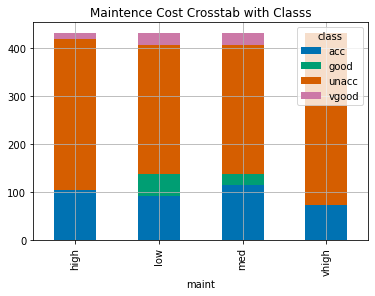

In [10]:
ct = pd.crosstab(data['maint'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Maintence Cost Crosstab with Classs')
plt.savefig('mental_plots/crosstab_maint.png')

class  acc  good  unacc  vgood
doors                         
2       81    15    326     10
3       99    18    300     15
4      102    18    292     20
5more  102    18    292     20


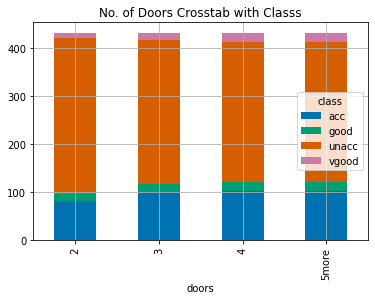

In [11]:
ct = pd.crosstab(data['doors'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('No. of Doors Crosstab with Classs')
plt.savefig('mental_plots/crosstab_door.png')

class    acc  good  unacc  vgood
persons                         
2          0     0    576      0
4        198    36    312     30
more     186    33    322     35


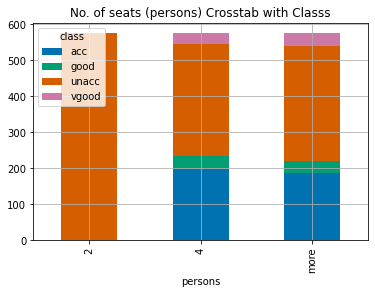

In [12]:
ct = pd.crosstab(data['persons'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('No. of seats (persons) Crosstab with Classs')
plt.savefig('mental_plots/crosstab_persons.png')

class     acc  good  unacc  vgood
lug_boot                         
big       144    24    368     40
med       135    24    392     25
small     105    21    450      0


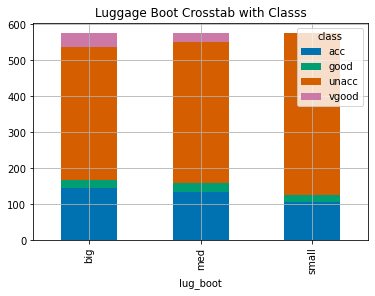

In [13]:
ct = pd.crosstab(data['lug_boot'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Luggage Boot Crosstab with Classs')
plt.savefig('mental_plots/crosstab_lug_boot.png')

class   acc  good  unacc  vgood
safety                         
high    204    30    277     65
low       0     0    576      0
med     180    39    357      0


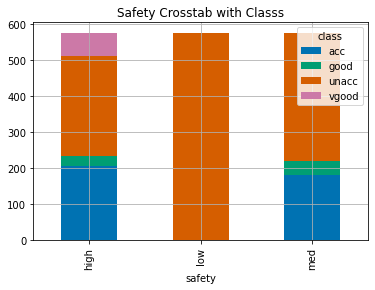

In [14]:
ct = pd.crosstab(data['safety'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Safety Crosstab with Classs')
plt.savefig('mental_plots/crosstab_safety.png')

# Label Encoding
Original Dataset
```
   buying       vhigh, high, med, low
   maint        vhigh, high, med, low
   doors        2, 3, 4, 5more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high
   
   class        unacc, acc, good, vgood
```

Encoded Dataset
```
   buying       4, 3, 2, 1
   maint        4, 3, 2, 1
   doors        2, 3, 4, 5
   persons      2, 4, 6
   lug_boot     1, 2, 3
   safety       1, 2, 3
   
   class        0, 1, 2, 3
```
Note: There is no dash symbol in original dataset, only appears in dataset description.

In [15]:
def label_encoding(car_dataset):
    encoded = car_dataset.replace('vhigh', 4).replace('high', 3).replace('med', 2).replace('low', 1)\
    .replace('5more', 5).replace('more', 6).replace('small', 1).replace('big', 3).replace('unacc', 0)\
    .replace('acc', 1).replace('good', 2).replace('vgood', 3)
    return encoded

In [16]:
data = label_encoding(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0


# Train-Test Splitting & Cross Validation

In [17]:
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_score
from external_fn import plot_learning_curve, plot_validation_curve

x = data[['buying', 'maint','doors', 'persons','lug_boot', 'safety']]
y = data['class']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42, stratify=y)

### Cross Validation

Stratified K-Folds cross-validator : "The folds are made by preserving the percentage of samples for each class."
Note: Stratified K-Folds is the default CV option when it is a classification problem.

In [19]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

### Initialize Score Reporting

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [21]:
result = {
    'Decision_Tree': {}, 
    'Neural_Network': {},
    'Boosting': {},
    'SVM': {},
    'k-NN': {}
}

# 1 Decision Trees

with some form of pruning and describe split attributes

max_depth =  1
F1 Score:  0.5757146789351579
Training Accuracy:  0.7004341534008683
Testing Accuracy:  0.6994219653179191
Confusion Matrix
[[242   0   0   0]
 [ 77   0   0   0]
 [ 14   0   0   0]
 [ 13   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       242
           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.70       346
   macro avg       0.17      0.25      0.21       346
weighted avg       0.49      0.70      0.58       346

Cross Validation Score
[0.69942197 0.69942197 0.69942197 0.69942197 0.69942197 0.69942197
 0.69942197 0.69942197 0.70348837 0.70348837]


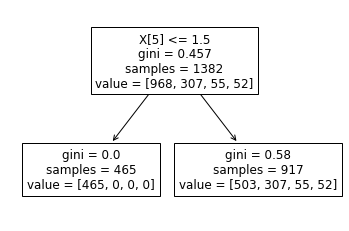

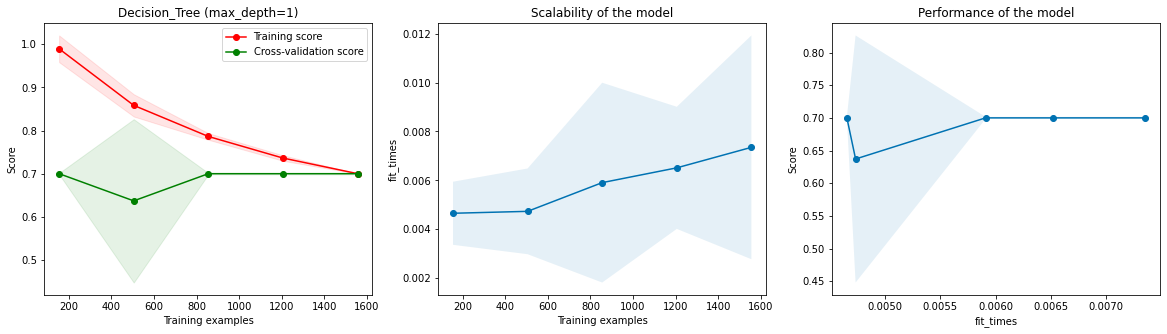

--------------------------------------------------
max_depth =  2
F1 Score:  0.7426532846335455
Training Accuracy:  0.7850940665701881
Testing Accuracy:  0.7485549132947977
Confusion Matrix
[[182  60   0   0]
 [  0  77   0   0]
 [  0  14   0   0]
 [  0  13   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       242
           1       0.47      1.00      0.64        77
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.75       346
   macro avg       0.37      0.44      0.37       346
weighted avg       0.80      0.75      0.74       346

Cross Validation Score
[0.63583815 0.6300578  0.8150289  0.6300578  0.80924855 0.79190751
 0.8150289  0.89017341 0.86046512 0.90116279]


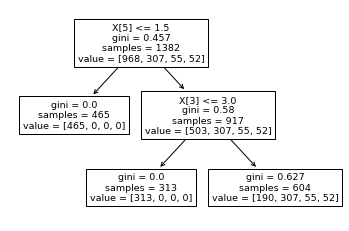

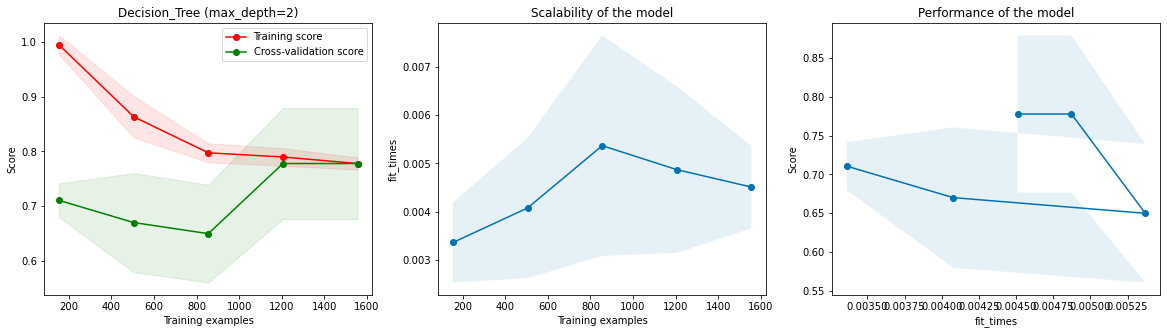

--------------------------------------------------
max_depth =  3
F1 Score:  0.7518167137078751
Training Accuracy:  0.7930535455861071
Testing Accuracy:  0.7861271676300579
Confusion Matrix
[[231  11   0   0]
 [ 36  41   0   0]
 [  0  14   0   0]
 [  0  13   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       242
           1       0.52      0.53      0.53        77
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.79       346
   macro avg       0.35      0.37      0.36       346
weighted avg       0.72      0.79      0.75       346

Cross Validation Score
[0.69942197 0.6300578  0.69942197 0.6300578  0.78034682 0.61849711
 0.8150289  0.89017341 0.86046512 0.90116279]


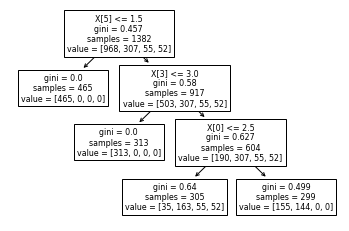

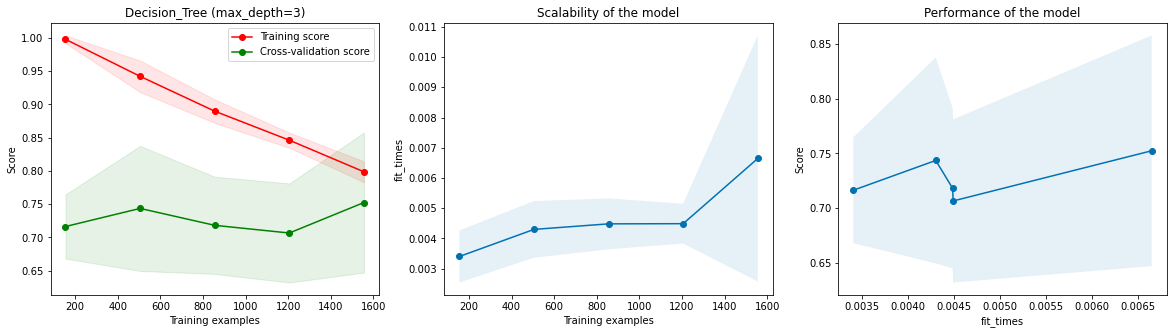

--------------------------------------------------
max_depth =  4
F1 Score:  0.8289516580977802
Training Accuracy:  0.8552821997105644
Testing Accuracy:  0.8323699421965318
Confusion Matrix
[[219  23   0   0]
 [  9  55  13   0]
 [  0   0  14   0]
 [  0   3  10   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       242
           1       0.68      0.71      0.70        77
           2       0.38      1.00      0.55        14
           3       0.00      0.00      0.00        13

    accuracy                           0.83       346
   macro avg       0.50      0.65      0.54       346
weighted avg       0.84      0.83      0.83       346

Cross Validation Score
[0.92485549 0.6300578  0.6416185  0.6300578  0.80924855 0.79190751
 0.75144509 0.78612717 0.86046512 0.8255814 ]


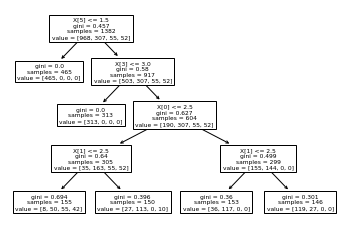

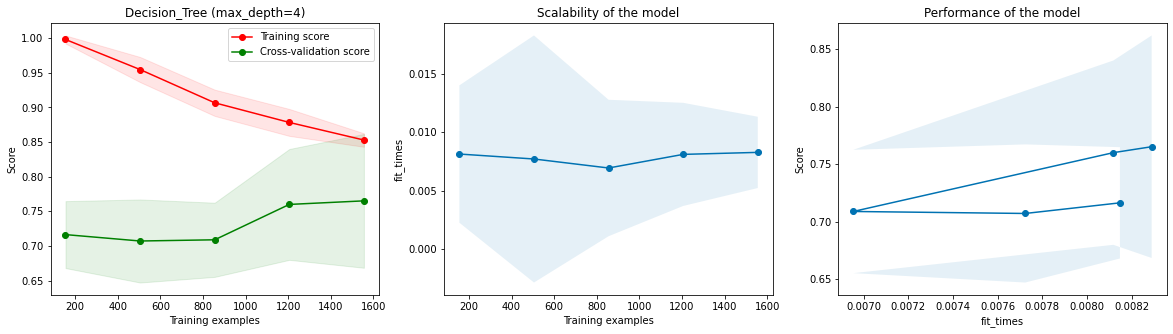

--------------------------------------------------
max_depth =  5
F1 Score:  0.8420064446331561
Training Accuracy:  0.8762662807525325
Testing Accuracy:  0.8526011560693642
Confusion Matrix
[[219  23   0   0]
 [  9  66   0   2]
 [  0   8   0   6]
 [  0   3   0  10]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       242
           1       0.66      0.86      0.75        77
           2       0.00      0.00      0.00        14
           3       0.56      0.77      0.65        13

    accuracy                           0.85       346
   macro avg       0.54      0.63      0.58       346
weighted avg       0.84      0.85      0.84       346

Cross Validation Score
[0.9132948  0.68786127 0.67630058 0.6300578  0.87283237 0.79190751
 0.8150289  0.80346821 0.90116279 0.80232558]


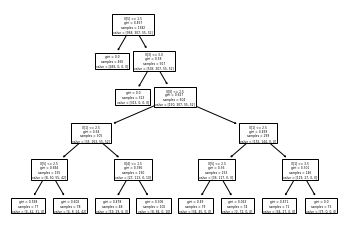

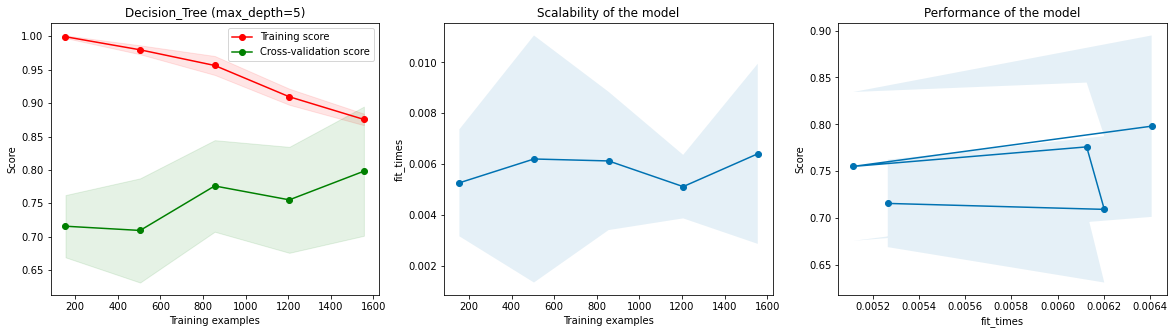

--------------------------------------------------
max_depth =  6
F1 Score:  0.9411581235467901
Training Accuracy:  0.9334298118668596
Testing Accuracy:  0.9393063583815029
Confusion Matrix
[[235   7   0   0]
 [  1  68   6   2]
 [  0   0  12   2]
 [  0   3   0  10]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       242
           1       0.87      0.88      0.88        77
           2       0.67      0.86      0.75        14
           3       0.71      0.77      0.74        13

    accuracy                           0.94       346
   macro avg       0.81      0.87      0.84       346
weighted avg       0.94      0.94      0.94       346

Cross Validation Score
[0.98265896 0.68208092 0.79768786 0.67630058 0.87283237 0.9132948
 0.87283237 0.88439306 0.95930233 0.8372093 ]


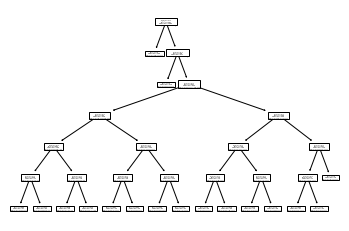

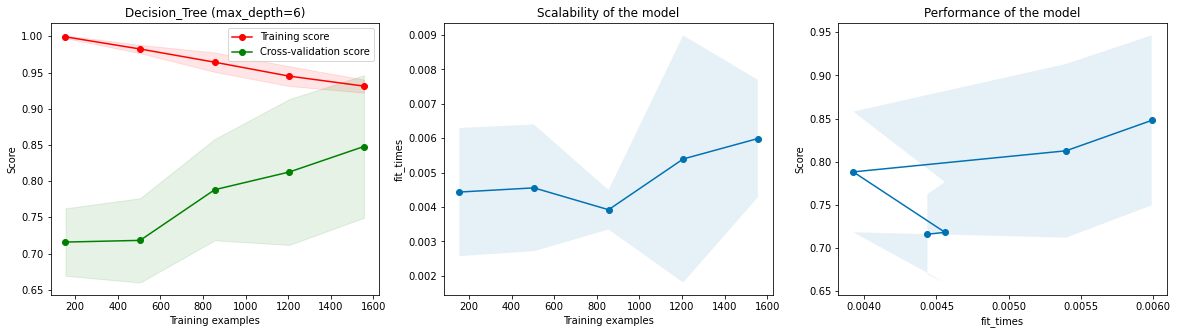

--------------------------------------------------
max_depth =  7
F1 Score:  0.9076000856347676
Training Accuracy:  0.9421128798842258
Testing Accuracy:  0.9104046242774566
Confusion Matrix
[[232  10   0   0]
 [  6  68   1   2]
 [  0   7   5   2]
 [  0   3   0  10]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       242
           1       0.77      0.88      0.82        77
           2       0.83      0.36      0.50        14
           3       0.71      0.77      0.74        13

    accuracy                           0.91       346
   macro avg       0.82      0.74      0.76       346
weighted avg       0.91      0.91      0.91       346

Cross Validation Score
[0.94797688 0.68786127 0.76300578 0.76300578 0.84971098 0.87283237
 0.8150289  0.88439306 0.86046512 0.77906977]


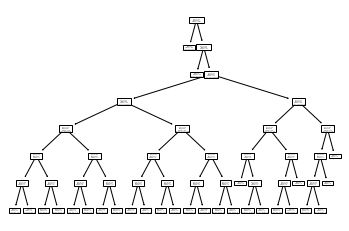

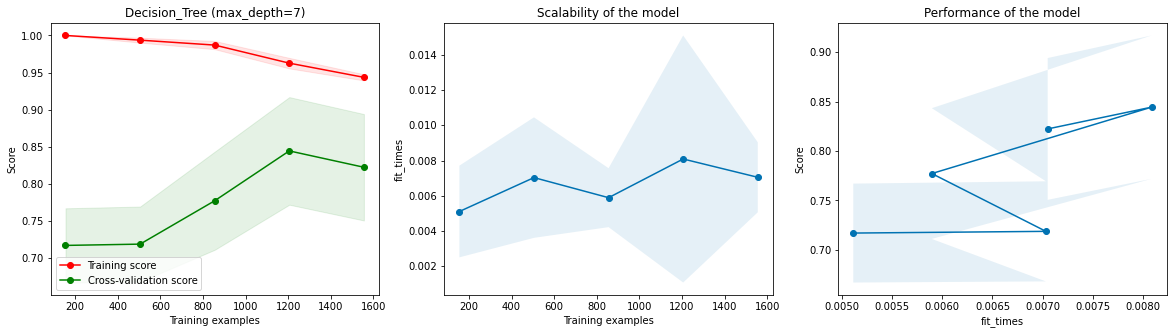

--------------------------------------------------
max_depth =  8
F1 Score:  0.9801580438350251
Training Accuracy:  0.9761215629522432
Testing Accuracy:  0.9797687861271677
Confusion Matrix
[[240   2   0   0]
 [  0  74   2   1]
 [  0   0  12   2]
 [  0   0   0  13]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       242
           1       0.97      0.96      0.97        77
           2       0.86      0.86      0.86        14
           3       0.81      1.00      0.90        13

    accuracy                           0.98       346
   macro avg       0.91      0.95      0.93       346
weighted avg       0.98      0.98      0.98       346

Cross Validation Score
[0.98843931 0.72254335 0.8150289  0.69942197 0.89017341 0.86705202
 0.9017341  0.9132948  0.95930233 0.86046512]


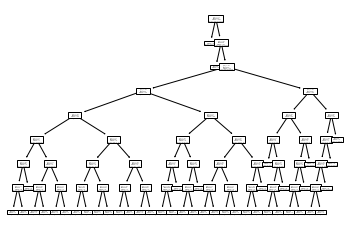

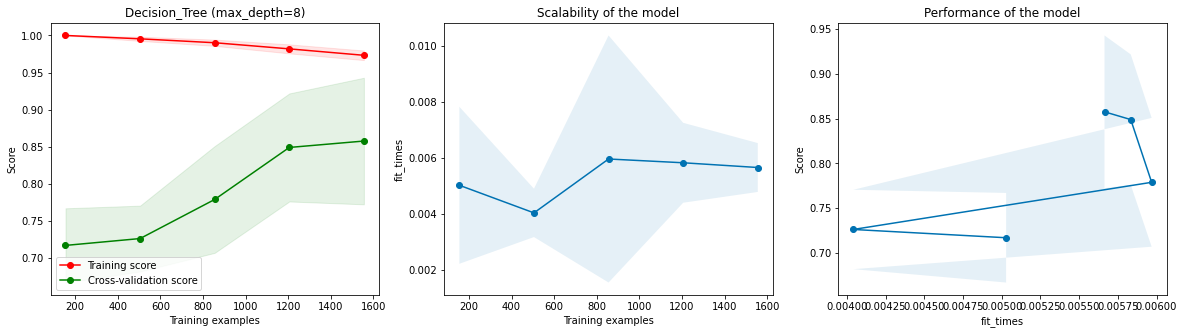

--------------------------------------------------
max_depth =  9
F1 Score:  0.9448412854789058
Training Accuracy:  0.9869753979739508
Testing Accuracy:  0.9479768786127167
Confusion Matrix
[[241   1   0   0]
 [  8  67   1   1]
 [  0   5   7   2]
 [  0   0   0  13]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       242
           1       0.92      0.87      0.89        77
           2       0.88      0.50      0.64        14
           3       0.81      1.00      0.90        13

    accuracy                           0.95       346
   macro avg       0.89      0.84      0.85       346
weighted avg       0.95      0.95      0.94       346

Cross Validation Score
[0.95375723 0.77456647 0.80346821 0.79190751 0.87861272 0.86127168
 0.9132948  0.89595376 0.95348837 0.86046512]


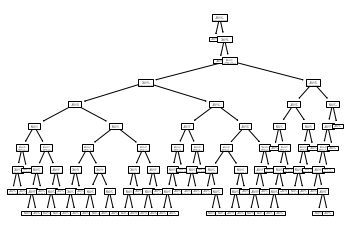

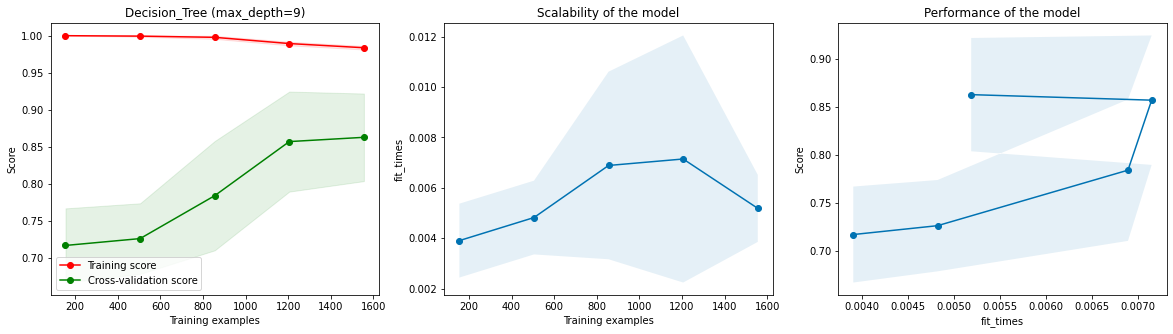

--------------------------------------------------
max_depth =  10
F1 Score:  0.9641308345547267
Training Accuracy:  0.9971056439942113
Testing Accuracy:  0.9653179190751445
Confusion Matrix
[[240   2   0   0]
 [  4  72   1   0]
 [  0   5   9   0]
 [  0   0   0  13]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       242
           1       0.91      0.94      0.92        77
           2       0.90      0.64      0.75        14
           3       1.00      1.00      1.00        13

    accuracy                           0.97       346
   macro avg       0.95      0.89      0.92       346
weighted avg       0.96      0.97      0.96       346

Cross Validation Score
[0.95953757 0.77456647 0.8265896  0.77456647 0.9017341  0.89595376
 0.91907514 0.92485549 0.95348837 0.86046512]


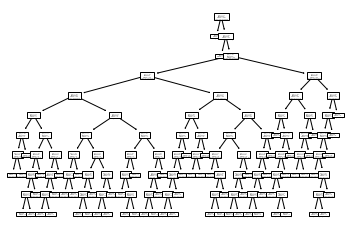

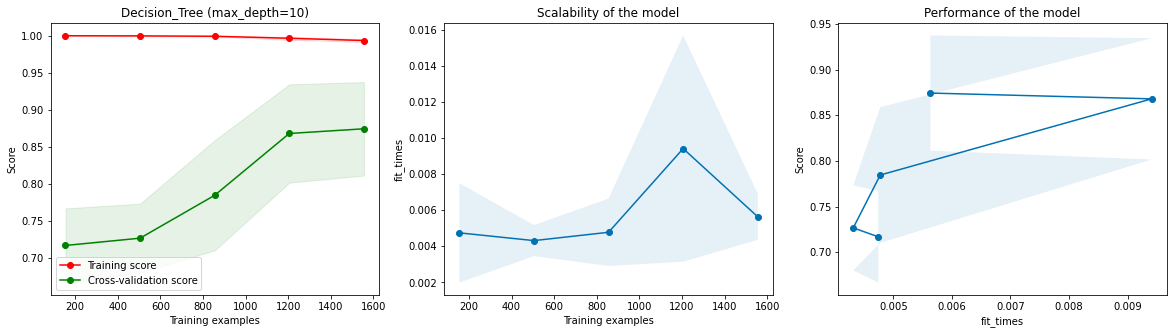

--------------------------------------------------
max_depth =  11
F1 Score:  0.9766104429947247
Training Accuracy:  0.9992764109985528
Testing Accuracy:  0.976878612716763
Confusion Matrix
[[241   1   0   0]
 [  4  72   1   0]
 [  0   2  12   0]
 [  0   0   0  13]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       242
           1       0.96      0.94      0.95        77
           2       0.92      0.86      0.89        14
           3       1.00      1.00      1.00        13

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346

Cross Validation Score
[0.95953757 0.79190751 0.8265896  0.76300578 0.90751445 0.89017341
 0.91907514 0.92485549 0.9244186  0.86046512]


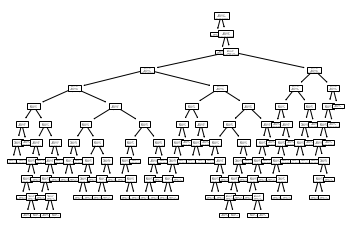

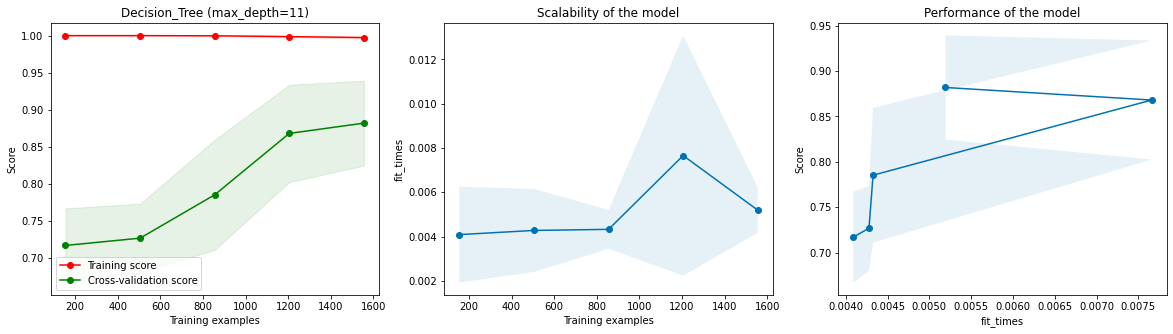

--------------------------------------------------
max_depth =  12
F1 Score:  0.9766104429947247
Training Accuracy:  1.0
Testing Accuracy:  0.976878612716763
Confusion Matrix
[[241   1   0   0]
 [  4  72   1   0]
 [  0   2  12   0]
 [  0   0   0  13]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       242
           1       0.96      0.94      0.95        77
           2       0.92      0.86      0.89        14
           3       1.00      1.00      1.00        13

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346

Cross Validation Score
[0.95953757 0.78612717 0.83236994 0.76300578 0.90751445 0.87861272
 0.91907514 0.92485549 0.95930233 0.86046512]


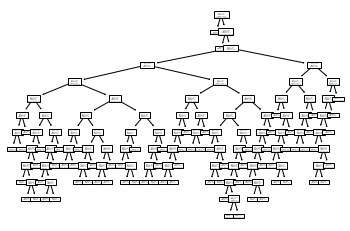

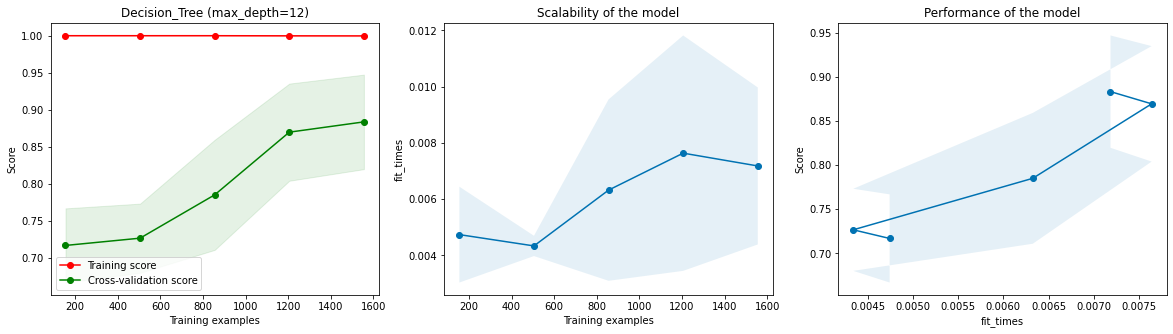

--------------------------------------------------


NameError: name 'new_params' is not defined

In [31]:
task = "Decision_Tree"
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

f1 = []
train_acc = []
test_acc = []
params = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for k in params:
    print("max_depth = ", k)
    clf = DecisionTreeClassifier(max_depth = k)
    fit_tree = clf.fit(x_train, y_train)
    
    # See the tree
    tree.plot_tree(fit_tree) 
    plt.savefig(f'mental_plots/learning_curve_{task}_tree_{k}.png')
    
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10)
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    # Learning Curve
    plot_learning_curve(clf, f"{task} (max_depth={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
    plt.show()
    
    print("--------------------------------------------------")
    
# Validation Curve
new_params += [12, 20, 30, 50]
plot_validation_curve(DecisionTreeClassifier(), f"{task}: max_depth", x, y, "max_depth", new_params, scoring="f1_weighted", axes=None, cv=10, n_jobs=4)
plt.savefig(f'mental_plots/validation_curve_{task}.png')
plt.show()

# 2 Neural Networks

hidden_layer_sizes =  3 , activation =  relu
F1 Score:  0.7160340675569559
Training Accuracy:  0.7879884225759769
Testing Accuracy:  0.7572254335260116
Confusion Matrix
[[231  11   0   0]
 [ 46  31   0   0]
 [  2  12   0   0]
 [  0  13   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       242
           1       0.46      0.40      0.43        77
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.76       346
   macro avg       0.32      0.34      0.33       346
weighted avg       0.68      0.76      0.72       346

Cross Validation Score
[0.77456647 0.76878613 0.79768786 0.79768786 0.8265896  0.78034682
 0.80924855 0.7283237  0.84302326 0.4244186 ]


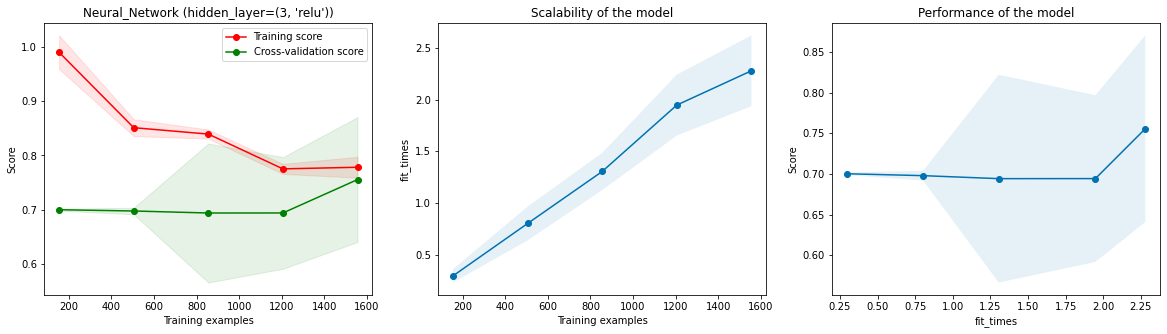

--------------------------------------------------
hidden_layer_sizes =  4 , activation =  relu
F1 Score:  0.643043597244467
Training Accuracy:  0.6960926193921853
Testing Accuracy:  0.7196531791907514
Confusion Matrix
[[238   4   0   0]
 [ 66  11   0   0]
 [  5   9   0   0]
 [  6   7   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.98      0.85       242
           1       0.35      0.14      0.20        77
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.72       346
   macro avg       0.28      0.28      0.26       346
weighted avg       0.61      0.72      0.64       346

Cross Validation Score
[0.69942197 0.69942197 0.70520231 0.71676301 0.74566474 0.70520231
 0.71676301 0.69942197 0.77906977 0.43604651]


<Figure size 432x288 with 0 Axes>

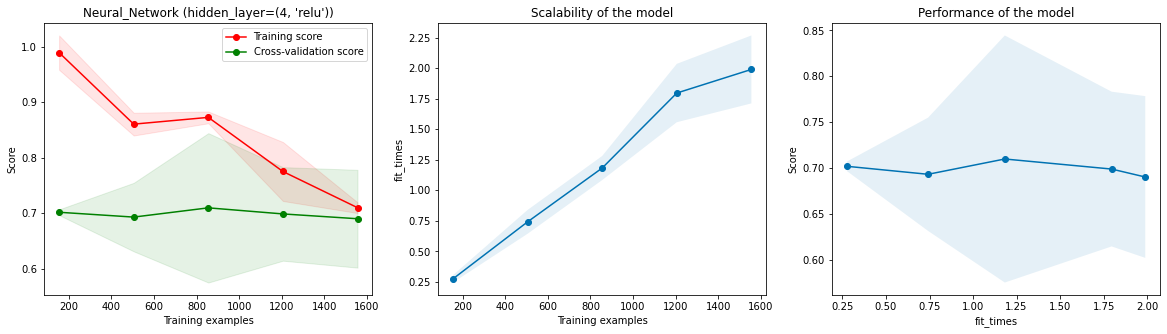

--------------------------------------------------
hidden_layer_sizes =  5 , activation =  relu
F1 Score:  0.885370319613511
Training Accuracy:  0.9081041968162084
Testing Accuracy:  0.8930635838150289
Confusion Matrix
[[234   8   0   0]
 [  7  68   1   1]
 [  0   6   2   6]
 [  0   5   3   5]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       242
           1       0.78      0.88      0.83        77
           2       0.33      0.14      0.20        14
           3       0.42      0.38      0.40        13

    accuracy                           0.89       346
   macro avg       0.63      0.59      0.60       346
weighted avg       0.88      0.89      0.89       346

Cross Validation Score
[0.82080925 0.86127168 0.89595376 0.9017341  0.87861272 0.84971098
 0.93641618 0.93063584 0.93604651 0.66860465]


<Figure size 432x288 with 0 Axes>

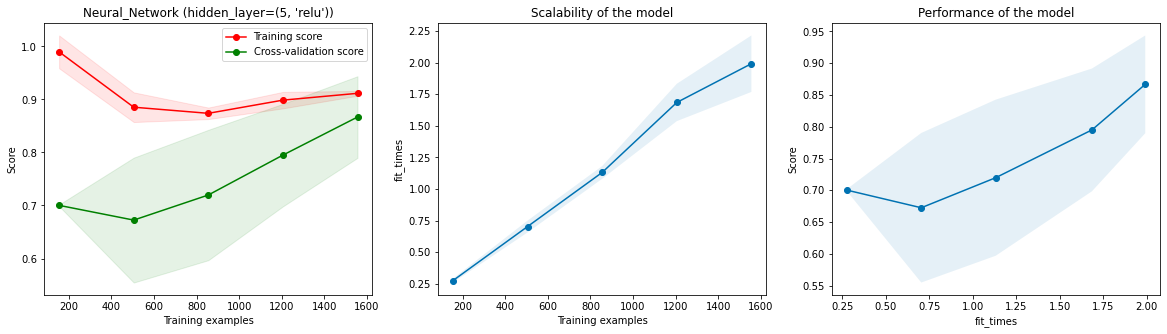

--------------------------------------------------
hidden_layer_sizes =  6 , activation =  relu
F1 Score:  0.8450396399278028
Training Accuracy:  0.8856729377713459
Testing Accuracy:  0.8497109826589595
Confusion Matrix
[[225  14   3   0]
 [ 17  58   2   0]
 [  0   9   2   3]
 [  0   3   1   9]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       242
           1       0.69      0.75      0.72        77
           2       0.25      0.14      0.18        14
           3       0.75      0.69      0.72        13

    accuracy                           0.85       346
   macro avg       0.66      0.63      0.64       346
weighted avg       0.84      0.85      0.85       346

Cross Validation Score
[0.80346821 0.84393064 0.90751445 0.83236994 0.86705202 0.84971098
 0.9132948  0.94219653 0.91860465 0.66860465]


<Figure size 432x288 with 0 Axes>

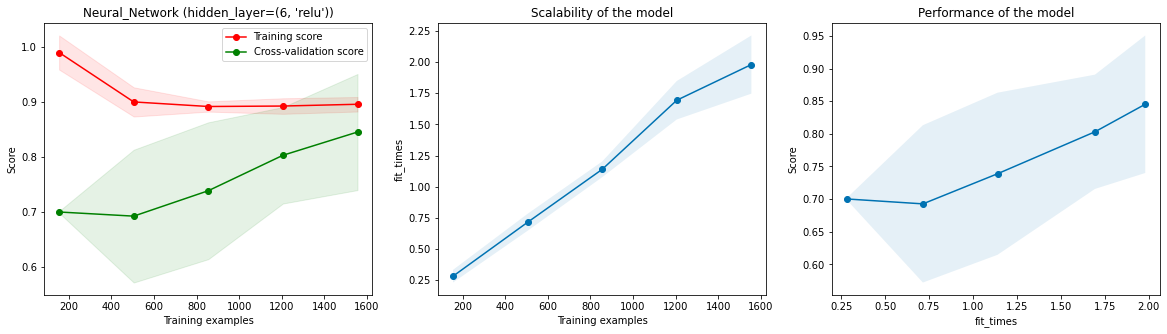

--------------------------------------------------
hidden_layer_sizes =  10 , activation =  relu
F1 Score:  0.8345800869494129
Training Accuracy:  0.8806078147612156
Testing Accuracy:  0.846820809248555
Confusion Matrix
[[232   9   1   0]
 [ 20  56   1   0]
 [  0  10   2   2]
 [  0   6   4   3]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       242
           1       0.69      0.73      0.71        77
           2       0.25      0.14      0.18        14
           3       0.60      0.23      0.33        13

    accuracy                           0.85       346
   macro avg       0.62      0.51      0.54       346
weighted avg       0.83      0.85      0.83       346

Cross Validation Score
[0.80924855 0.8150289  0.86127168 0.8150289  0.87861272 0.79768786
 0.91907514 0.90751445 0.94186047 0.64534884]


<Figure size 432x288 with 0 Axes>

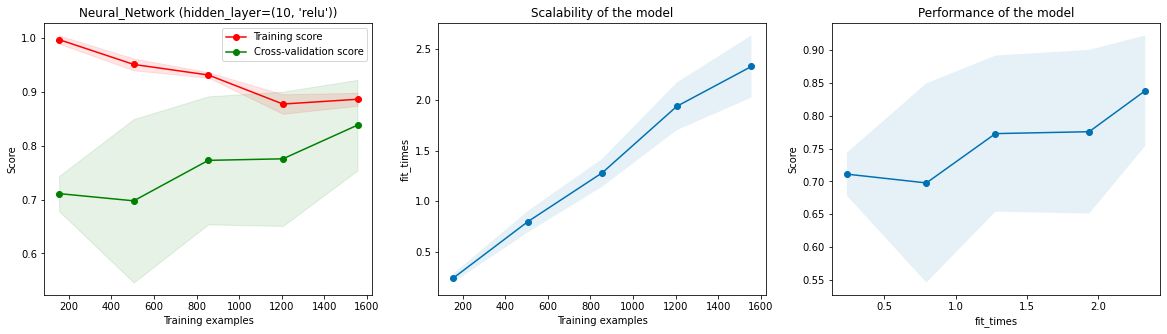

--------------------------------------------------
hidden_layer_sizes =  (2, 4) , activation =  relu
F1 Score:  0.713865760814897
Training Accuracy:  0.7807525325615051
Testing Accuracy:  0.7456647398843931
Confusion Matrix
[[223  19   0   0]
 [ 42  35   0   0]
 [  0  14   0   0]
 [  0  13   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       242
           1       0.43      0.45      0.44        77
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.75       346
   macro avg       0.32      0.34      0.33       346
weighted avg       0.68      0.75      0.71       346

Cross Validation Score
[0.74566474 0.75722543 0.69942197 0.79768786 0.8265896  0.7283237
 0.78612717 0.71676301 0.78488372 0.48837209]


<Figure size 432x288 with 0 Axes>

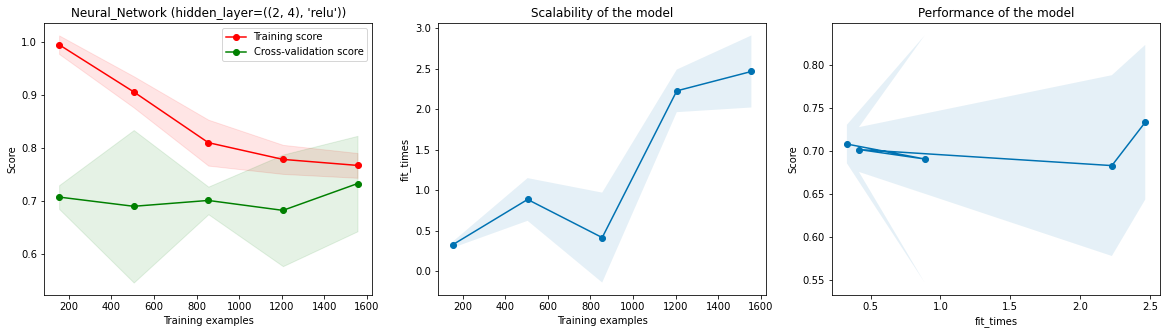

--------------------------------------------------
hidden_layer_sizes =  (3, 3) , activation =  relu
F1 Score:  0.7456225319063698
Training Accuracy:  0.7908827785817656
Testing Accuracy:  0.7774566473988439
Confusion Matrix
[[227  15   0   0]
 [ 35  42   0   0]
 [  1  13   0   0]
 [  0  13   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       242
           1       0.51      0.55      0.52        77
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.78       346
   macro avg       0.34      0.37      0.36       346
weighted avg       0.72      0.78      0.75       346

Cross Validation Score
[0.70520231 0.76878613 0.80924855 0.8265896  0.84393064 0.83236994
 0.80924855 0.87283237 0.75       0.4244186 ]


<Figure size 432x288 with 0 Axes>

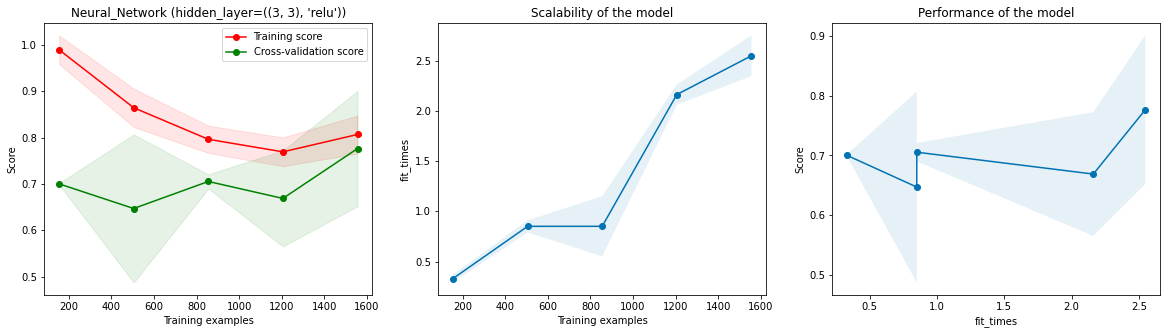

--------------------------------------------------
hidden_layer_sizes =  (4, 2) , activation =  relu
F1 Score:  0.5757146789351579
Training Accuracy:  0.7004341534008683
Testing Accuracy:  0.6994219653179191
Confusion Matrix
[[242   0   0   0]
 [ 77   0   0   0]
 [ 14   0   0   0]
 [ 13   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       242
           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.70       346
   macro avg       0.17      0.25      0.21       346
weighted avg       0.49      0.70      0.58       346

Cross Validation Score
[0.69942197 0.69942197 0.69942197 0.69942197 0.69942197 0.69942197
 0.69942197 0.69942197 0.70348837 0.70348837]


<Figure size 432x288 with 0 Axes>

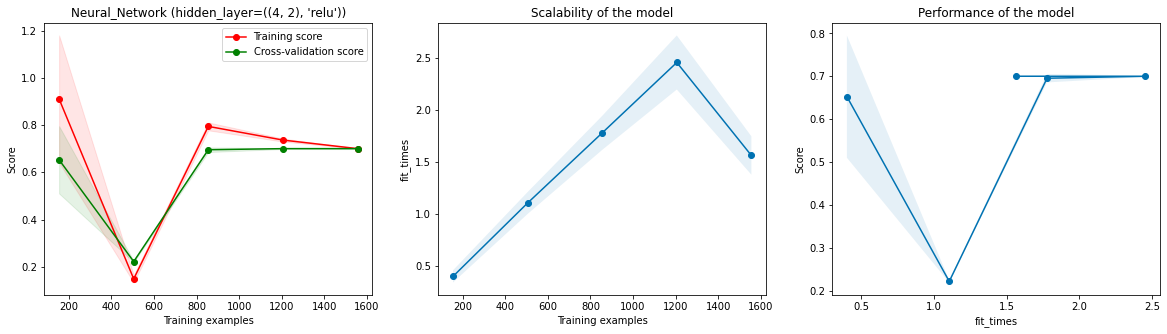

--------------------------------------------------
hidden_layer_sizes =  (5, 5) , activation =  relu
F1 Score:  0.8457741044394637
Training Accuracy:  0.8871201157742402
Testing Accuracy:  0.861271676300578
Confusion Matrix
[[230  12   0   0]
 [ 18  59   0   0]
 [  0   9   0   5]
 [  0   3   1   9]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       242
           1       0.71      0.77      0.74        77
           2       0.00      0.00      0.00        14
           3       0.64      0.69      0.67        13

    accuracy                           0.86       346
   macro avg       0.57      0.60      0.59       346
weighted avg       0.83      0.86      0.85       346

Cross Validation Score
[0.82080925 0.80924855 0.9132948  0.87861272 0.9017341  0.84971098
 0.91907514 0.90751445 0.90116279 0.72674419]


<Figure size 432x288 with 0 Axes>

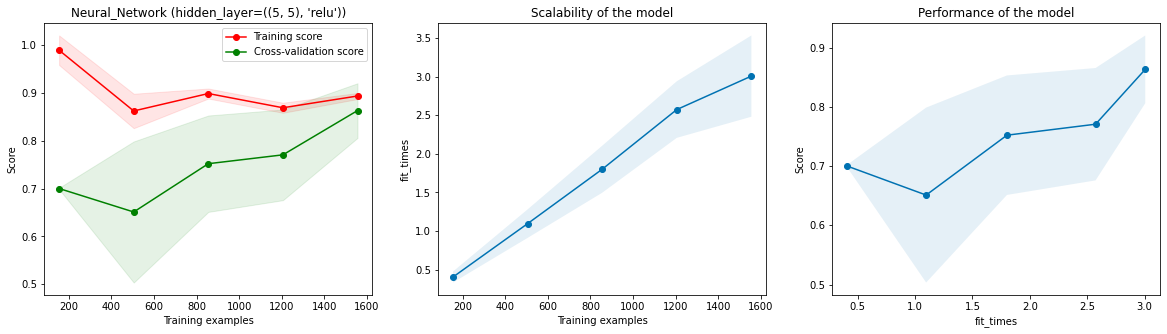

--------------------------------------------------
hidden_layer_sizes =  (10, 10) , activation =  relu
F1 Score:  0.9018231625912241
Training Accuracy:  0.926917510853835
Testing Accuracy:  0.9075144508670521
Confusion Matrix
[[235   7   0   0]
 [  8  67   1   1]
 [  0   7   4   3]
 [  0   5   0   8]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       242
           1       0.78      0.87      0.82        77
           2       0.80      0.29      0.42        14
           3       0.67      0.62      0.64        13

    accuracy                           0.91       346
   macro avg       0.80      0.69      0.71       346
weighted avg       0.91      0.91      0.90       346

Cross Validation Score
[0.82080925 0.87861272 0.90751445 0.86705202 0.86705202 0.86705202
 0.94797688 0.97687861 0.94186047 0.73837209]


<Figure size 432x288 with 0 Axes>

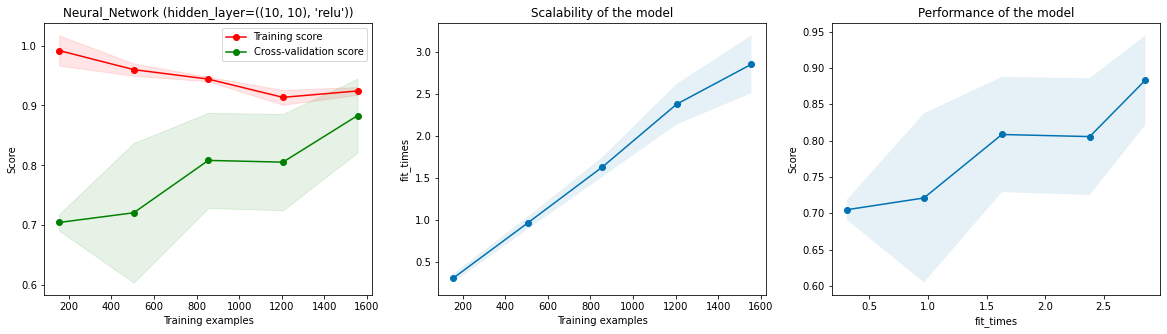

--------------------------------------------------
hidden_layer_sizes =  (5, 5, 5) , activation =  relu
F1 Score:  0.8542641253675521
Training Accuracy:  0.8921852387843705
Testing Accuracy:  0.869942196531792
Confusion Matrix
[[232  10   0   0]
 [ 16  61   0   0]
 [  0   8   0   6]
 [  0   4   1   8]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       242
           1       0.73      0.79      0.76        77
           2       0.00      0.00      0.00        14
           3       0.57      0.62      0.59        13

    accuracy                           0.87       346
   macro avg       0.56      0.59      0.58       346
weighted avg       0.84      0.87      0.85       346

Cross Validation Score
[0.82080925 0.83815029 0.84393064 0.89595376 0.88439306 0.86705202
 0.91907514 0.93641618 0.9127907  0.79069767]


<Figure size 432x288 with 0 Axes>

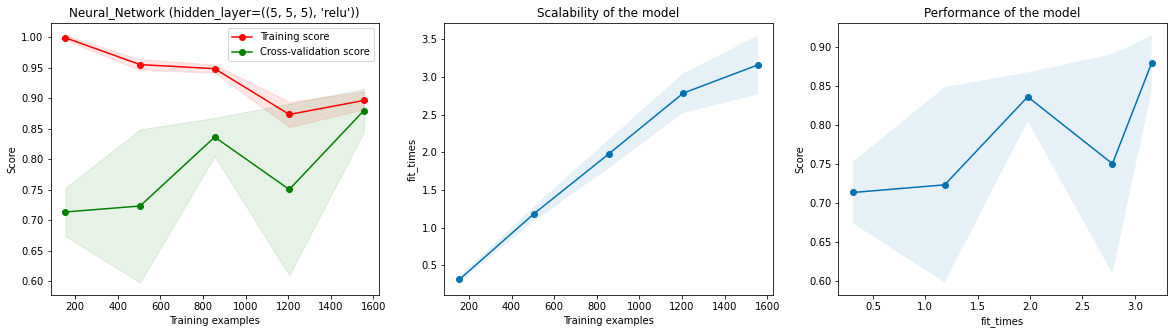

--------------------------------------------------
hidden_layer_sizes =  (5, 5, 5) , activation =  tanh
F1 Score:  0.9074858771459368
Training Accuracy:  0.9131693198263386
Testing Accuracy:  0.9104046242774566
Confusion Matrix
[[234   8   0   0]
 [  9  65   0   3]
 [  0   4   5   5]
 [  0   2   0  11]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       242
           1       0.82      0.84      0.83        77
           2       1.00      0.36      0.53        14
           3       0.58      0.85      0.69        13

    accuracy                           0.91       346
   macro avg       0.84      0.75      0.75       346
weighted avg       0.92      0.91      0.91       346

Cross Validation Score
[0.8150289  0.88439306 0.9017341  0.87283237 0.85549133 0.84393064
 0.93641618 0.95375723 0.9244186  0.80813953]


<Figure size 432x288 with 0 Axes>

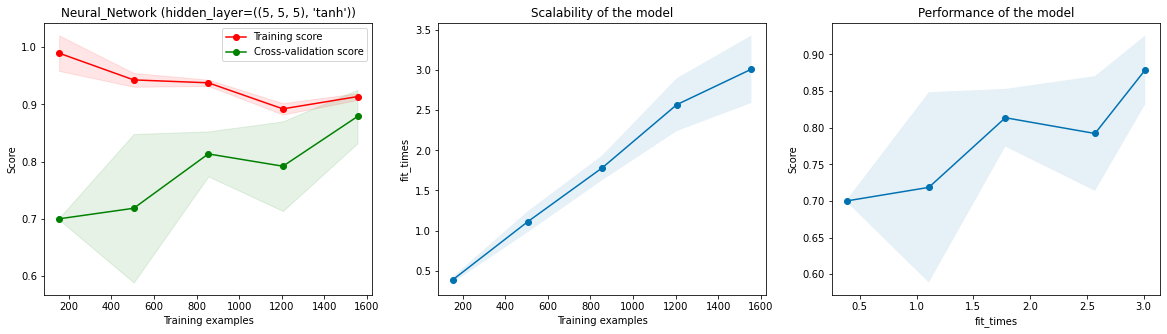

--------------------------------------------------
hidden_layer_sizes =  (6, 6, 6) , activation =  tanh
F1 Score:  0.8748417350106619
Training Accuracy:  0.8965267727930536
Testing Accuracy:  0.8901734104046243
Confusion Matrix
[[233   9   0   0]
 [ 11  64   0   2]
 [  0   7   0   7]
 [  0   2   0  11]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       242
           1       0.78      0.83      0.81        77
           2       0.00      0.00      0.00        14
           3       0.55      0.85      0.67        13

    accuracy                           0.89       346
   macro avg       0.57      0.66      0.61       346
weighted avg       0.86      0.89      0.87       346

Cross Validation Score
[0.79190751 0.87283237 0.89017341 0.87861272 0.84971098 0.84393064
 0.91907514 0.93641618 0.9127907  0.75581395]


<Figure size 432x288 with 0 Axes>

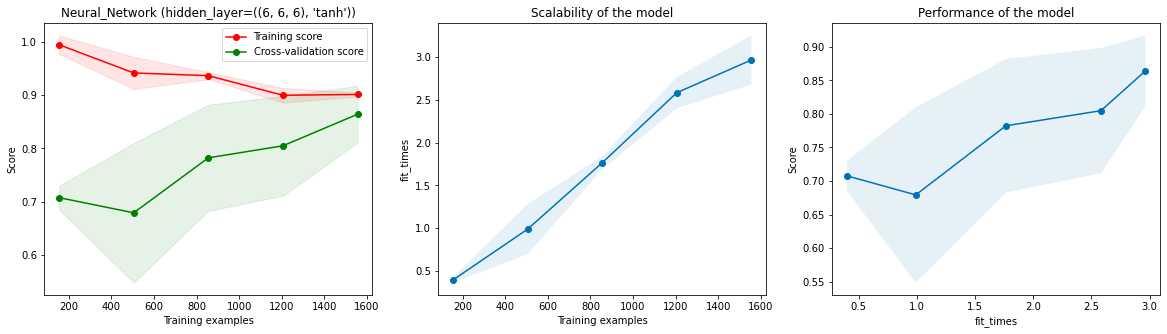

--------------------------------------------------
hidden_layer_sizes =  (10, 10, 10) , activation =  tanh
F1 Score:  0.9082138014700636
Training Accuracy:  0.9167872648335745
Testing Accuracy:  0.9104046242774566
Confusion Matrix
[[232  10   0   0]
 [  6  68   1   2]
 [  0   4   5   5]
 [  0   3   0  10]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       242
           1       0.80      0.88      0.84        77
           2       0.83      0.36      0.50        14
           3       0.59      0.77      0.67        13

    accuracy                           0.91       346
   macro avg       0.80      0.74      0.74       346
weighted avg       0.92      0.91      0.91       346

Cross Validation Score
[0.80924855 0.84971098 0.9017341  0.86127168 0.87283237 0.84971098
 0.94797688 0.94219653 0.9127907  0.69767442]


<Figure size 432x288 with 0 Axes>

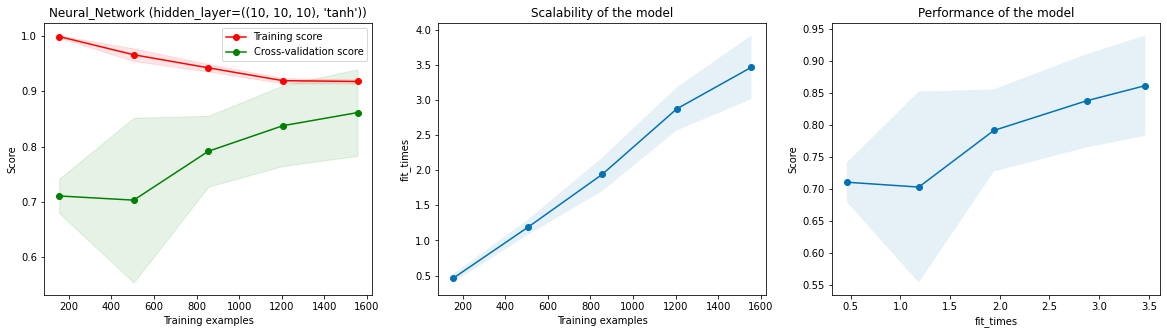

--------------------------------------------------


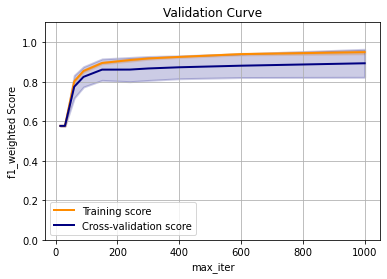

In [23]:
task = "Neural_Network"
# Multi-layer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

f1 = []
train_acc = []
test_acc = []
params = [
    ((3), 'relu'),
    ((4), 'relu'),
    ((5), 'relu'),
    ((6), 'relu'),
    ((10), 'relu'),
    ((2, 4), 'relu'),
    ((3, 3), 'relu'),
    ((4, 2), 'relu'),
    ((5, 5), 'relu'),
    ((10, 10), 'relu'),
    ((5, 5, 5), 'relu'),
    ((5, 5, 5), 'tanh'),
    ((6, 6, 6), 'tanh'),
    ((10, 10, 10), 'tanh'),
]
for k in params:
    print("hidden_layer_sizes = ", k[0], ", activation = ", k[1])
    clf = MLPClassifier(hidden_layer_sizes=k[0], max_iter=300,activation = k[1],solver='adam',random_state=1)
    fit_tree = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10)
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    # Learning Curve
    plot_learning_curve(clf, f"{task} (hidden_layer={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.show()
    plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
    
    print("--------------------------------------------------")
    
# Validation Curve
chosen_size = (10, 10, 10)
chosen_activation = 'tanh'
max_iter_list = [15, 30, 60, 90, 150, 240, 300, 400, 600, 1000]
plot_validation_curve(MLPClassifier(hidden_layer_sizes=k[0], max_iter=300,activation = chosen_activation,solver='adam',random_state=1), 
                      f"{task}: hidden_layer_sizes={chosen_size}, max_iter", x, y, "max_iter", max_iter_list, scoring="f1_weighted", axes=None, cv=10, n_jobs=4)
plt.savefig(f'mental_plots/validation_curve_{task}.png')
plt.show()

# 3 Boosting

with much more aggressive about pruning

Classifier =  AdaBoost
F1 Score:  0.8309384069219944
Training Accuracy:  0.8487698986975398
Testing Accuracy:  0.8179190751445087
Confusion Matrix
[[195  47   0   0]
 [  1  66   3   7]
 [  0   4   9   1]
 [  0   0   0  13]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       242
           1       0.56      0.86      0.68        77
           2       0.75      0.64      0.69        14
           3       0.62      1.00      0.76        13

    accuracy                           0.82       346
   macro avg       0.73      0.83      0.76       346
weighted avg       0.87      0.82      0.83       346

Cross Validation Score
[0.71676301 0.72254335 0.88439306 0.80924855 0.91907514 0.83815029
 0.75722543 0.88439306 0.88372093 0.8372093 ]


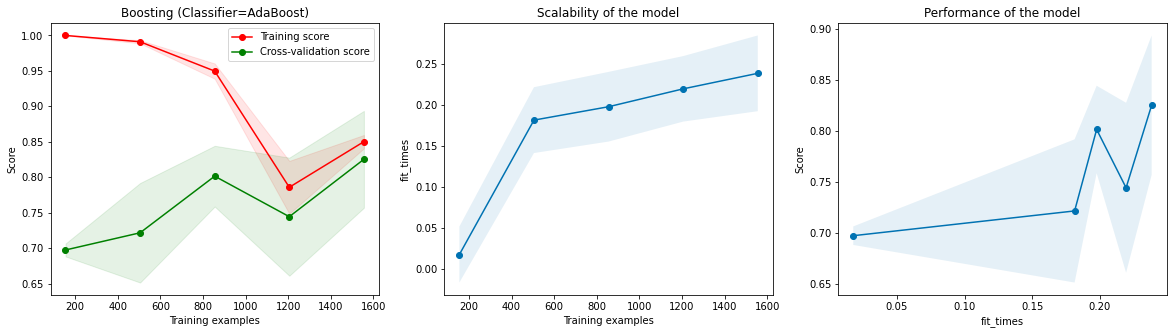

--------------------------------------------------
Classifier =  HistGradientBoosting
F1 Score:  1.0
Training Accuracy:  1.0
Testing Accuracy:  1.0
Confusion Matrix
[[242   0   0   0]
 [  0  77   0   0]
 [  0   0  14   0]
 [  0   0   0  13]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        13

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346

Cross Validation Score
[0.79190751 0.79768786 0.97109827 0.79190751 0.97687861 0.97687861
 0.93063584 0.94219653 0.93604651 0.9127907 ]


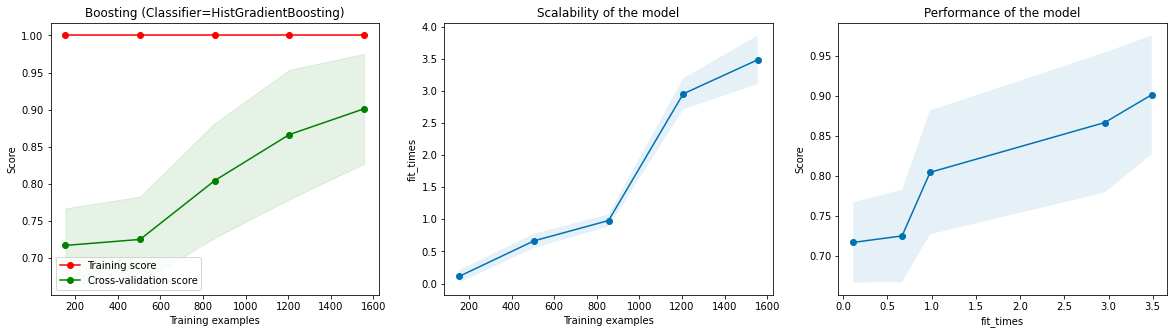

--------------------------------------------------
Classifier =  GradientBoosting
F1 Score:  0.9446270193127632
Training Accuracy:  0.975397973950796
Testing Accuracy:  0.9508670520231214
Confusion Matrix
[[236   6   0   0]
 [  1  76   0   0]
 [  0   8   4   2]
 [  0   0   0  13]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       242
           1       0.84      0.99      0.91        77
           2       1.00      0.29      0.44        14
           3       0.87      1.00      0.93        13

    accuracy                           0.95       346
   macro avg       0.93      0.81      0.82       346
weighted avg       0.96      0.95      0.94       346

Cross Validation Score
[0.83815029 0.78034682 0.77456647 0.78034682 0.88439306 0.85549133
 0.86705202 0.92485549 0.91860465 0.8372093 ]


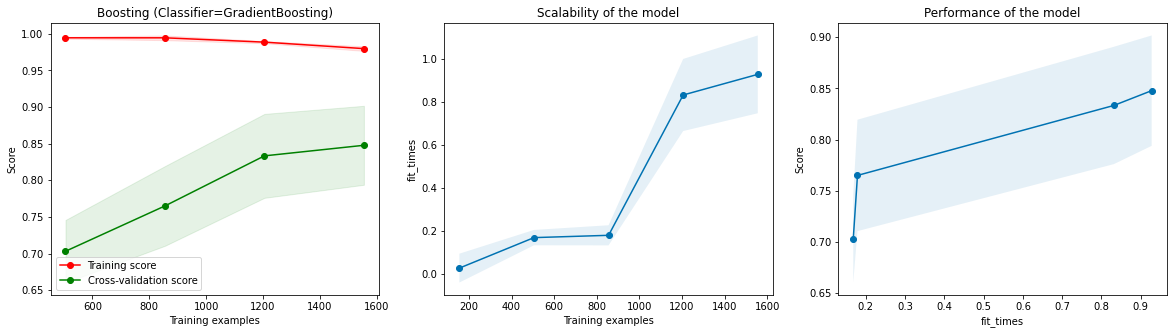

--------------------------------------------------


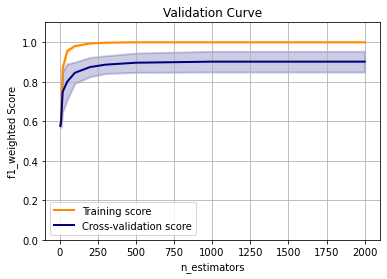

In [37]:
task = "Boosting"
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (AdaBoostClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)

base_estim = DecisionTreeClassifier(max_depth=1, max_features=0.06)

f1 = []
train_acc = []
test_acc = []
params = ["AdaBoost", "GradientBoosting", "HistGradientBoosting"]

for k, clf in [
    ("AdaBoost", AdaBoostClassifier(base_estimator=base_estim,
                        # n_estimators=100,
                        learning_rate=0.5,
                        random_state=42)),
    ("HistGradientBoosting", HistGradientBoostingClassifier(max_iter=300,
                                      validation_fraction=0.1,
                                      n_iter_no_change=15,
                                      verbose=0,
                                      random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier( # n_estimators=100,
                                 subsample=0.67,
                                 max_features=0.06,
                                 validation_fraction=0.1,
                                 n_iter_no_change=15,
                                 verbose=0,
                                 random_state=42)),
]:
    print("Classifier = ", k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10)
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])

    plot_learning_curve(clf, f"{task} (Classifier={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
    plt.show()
    print("--------------------------------------------------")

    
# Validation Curve
n_estimator_list = [5, 10 , 20, 50, 100, 200, 300, 500, 1000, 1500, 2000]
plot_validation_curve(GradientBoostingClassifier(
                                 subsample=0.67,
                                 max_features=0.06,
                                 validation_fraction=0.1,
                                 n_iter_no_change=15,
                                 verbose=0,
                                 random_state=42), f"{task}: GradientBoosting - n_estimators", x, y, "n_estimators", n_estimator_list, scoring="f1_weighted", axes=None, cv=10, n_jobs=4)
plt.savefig(f'mental_plots/validation_curve_{task}.png')
plt.show()

# 4 Support Vector Machines

with at least two kernel functions

kernel =  linear
F1 Score:  0.8370322983542383
Training Accuracy:  0.861794500723589
Testing Accuracy:  0.8439306358381503
Confusion Matrix
[[229  12   1   0]
 [ 30  46   1   0]
 [  5   1   8   0]
 [  0   4   0   9]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       242
           1       0.73      0.60      0.66        77
           2       0.80      0.57      0.67        14
           3       1.00      0.69      0.82        13

    accuracy                           0.84       346
   macro avg       0.85      0.70      0.76       346
weighted avg       0.84      0.84      0.84       346

Cross Validation Score
[0.73988439 0.79768786 0.86705202 0.8150289  0.85549133 0.8150289
 0.90751445 0.89017341 0.86627907 0.55813953]


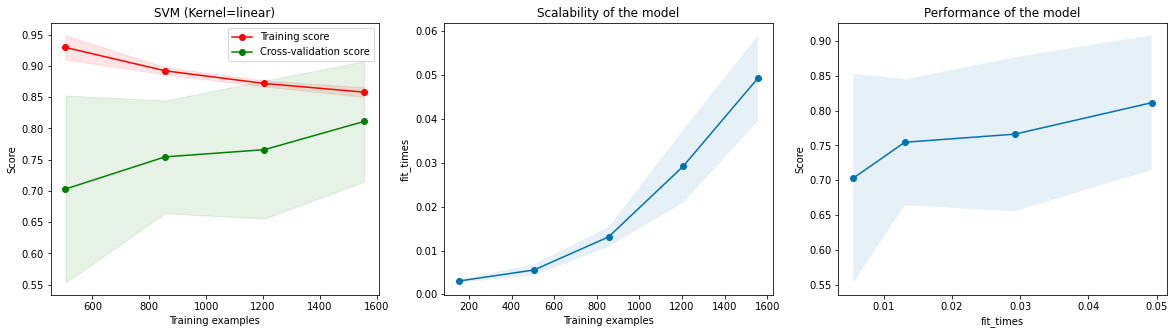

--------------------------------------------------
kernel =  poly
F1 Score:  0.9224607013624355
Training Accuracy:  0.9450072358900145
Testing Accuracy:  0.9248554913294798
Confusion Matrix
[[234   8   0   0]
 [ 10  66   1   0]
 [  0   5   7   2]
 [  0   0   0  13]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       242
           1       0.84      0.86      0.85        77
           2       0.88      0.50      0.64        14
           3       0.87      1.00      0.93        13

    accuracy                           0.92       346
   macro avg       0.88      0.83      0.84       346
weighted avg       0.92      0.92      0.92       346

Cross Validation Score
[0.85549133 0.87861272 0.85549133 0.89595376 0.92485549 0.87283237
 0.97109827 0.96531792 0.91860465 0.80232558]


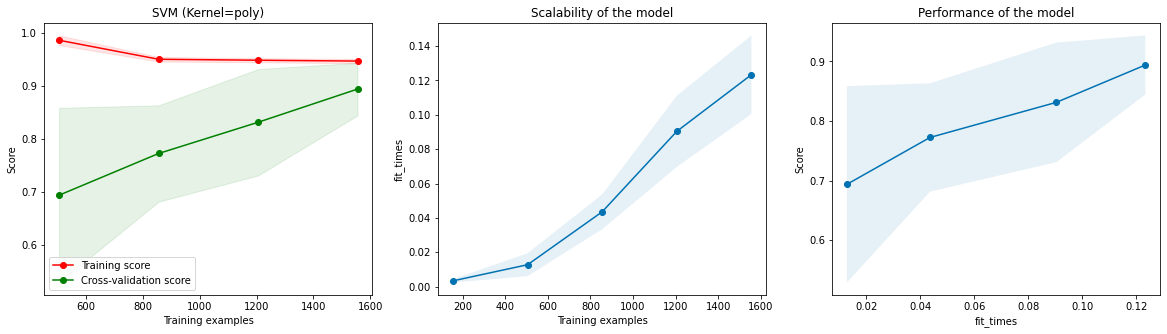

--------------------------------------------------
kernel =  rbf
F1 Score:  0.9364975675477799
Training Accuracy:  0.947178002894356
Testing Accuracy:  0.9393063583815029
Confusion Matrix
[[236   6   0   0]
 [  3  73   1   0]
 [  0   7   6   1]
 [  0   3   0  10]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       242
           1       0.82      0.95      0.88        77
           2       0.86      0.43      0.57        14
           3       0.91      0.77      0.83        13

    accuracy                           0.94       346
   macro avg       0.89      0.78      0.82       346
weighted avg       0.94      0.94      0.94       346

Cross Validation Score
[0.84393064 0.87283237 0.86127168 0.87861272 0.88439306 0.85549133
 0.93063584 0.97109827 0.93023256 0.86627907]


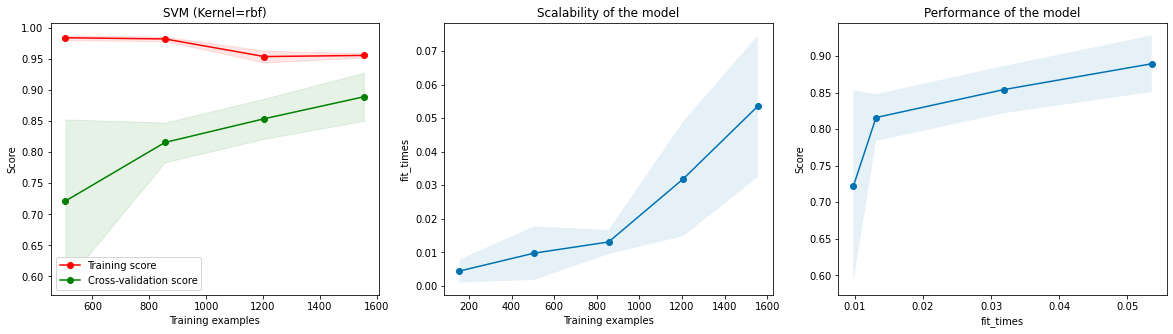

--------------------------------------------------
kernel =  sigmoid
F1 Score:  0.4907763884219544
Training Accuracy:  0.5861070911722142
Testing Accuracy:  0.5404624277456648
Confusion Matrix
[[187  55   0   0]
 [ 77   0   0   0]
 [ 14   0   0   0]
 [ 13   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       242
           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.54       346
   macro avg       0.16      0.19      0.18       346
weighted avg       0.45      0.54      0.49       346

Cross Validation Score
[0.69364162 0.67052023 0.69942197 0.67630058 0.69942197 0.69942197
 0.69942197 0.69942197 0.70348837 0.30813953]


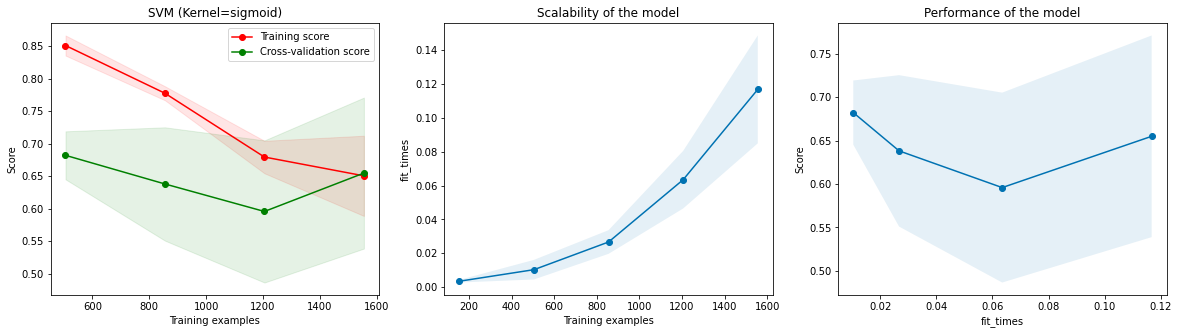

--------------------------------------------------


In [33]:
task = "SVM"
from sklearn import svm

for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    print("kernel = ", k)
    clf = svm.SVC(decision_function_shape='ovo', kernel=k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10)
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])

    plot_learning_curve(clf, f"{task} (Kernel={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
    plt.show()
    print("--------------------------------------------------")

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
# Grid Search
task = "SVM"
k = "rbf_gridsearch"
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, verbose=1, cv=10)

# Train the classifier
clf_grid.fit(x_train, y_train)

y_pred = clf_grid.predict(x_test)
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf_grid.score(x_train, y_train),
        "testing_acc": clf_grid.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf_grid, x, y, cv=10),
        "best_parameters": clf_grid.best_params_,
        "best_estimators": clf_grid.best_estimator_
    }
k = 'rbf_best_params'

print("F1 Score: ", result[task][k]["f1"])
print("Training Accuracy: ", result[task][k]["training_acc"])
print("Testing Accuracy: ", result[task][k]["testing_acc"])
print("Confusion Matrix")
print(result[task][k]["confusion_mat"])
print("Classification Report")
print(result[task][k]["classification_report"])
print("Cross Validation Score")
print(result[task][k]["cross_validation_score"])
print("Best Params : ", result[task][k]["best_parameters"])
    
# Add to lists
f1.append(result[task][k]["f1"])
train_acc.append(result[task][k]["training_acc"])
test_acc.append(result[task][k]["testing_acc"])

plot_learning_curve(clf, f"{task} (Kernel={k})", x, y, axes=None, cv=10, n_jobs=4)
plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
plt.show()

# Validation Curve
param_range = np.logspace(-6, 2, 8)
plot_validation_curve(svm.SVC(kernel='rbf'), 
                      f"{task}: RBF - gamma, max_iter", x, y, "gamma", param_range, scoring="f1_weighted", axes=None, cv=10, n_jobs=4)
plt.savefig(f'mental_plots/validation_curve_{task}.png')
plt.show()

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   14.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 100, 'gamma': 0.1}
Best Estimators:
 SVC(C=100, gamma=0.1)
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   18.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   20.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   17.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   19.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   17.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   18.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


# 5 K-Nearest Neighbors

with different values of k

K =  1
F1 Score:  0.826421769040061
Training Accuracy:  1.0
Testing Accuracy:  0.8236994219653179
Confusion Matrix
[[221  21   0   0]
 [ 15  51   5   6]
 [  1   3   6   4]
 [  0   4   2   7]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       242
           1       0.65      0.66      0.65        77
           2       0.46      0.43      0.44        14
           3       0.41      0.54      0.47        13

    accuracy                           0.82       346
   macro avg       0.61      0.64      0.62       346
weighted avg       0.83      0.82      0.83       346

Cross Validation Score
[0.92485549 0.75722543 0.80346821 0.68208092 0.8265896  0.75722543
 0.80924855 0.84971098 0.89534884 0.76162791]


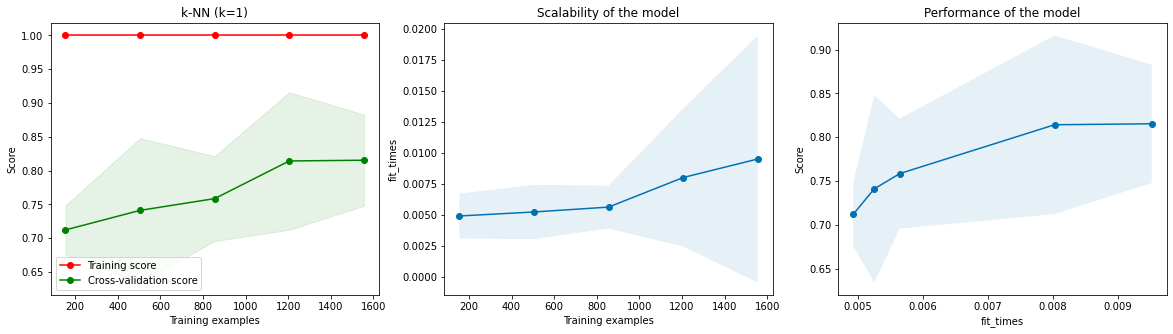

--------------------------------------------------
K =  3
F1 Score:  0.8945851534314618
Training Accuracy:  0.959479015918958
Testing Accuracy:  0.8988439306358381
Confusion Matrix
[[234   8   0   0]
 [ 12  64   1   0]
 [  2   6   6   0]
 [  0   4   2   7]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       242
           1       0.78      0.83      0.81        77
           2       0.67      0.43      0.52        14
           3       1.00      0.54      0.70        13

    accuracy                           0.90       346
   macro avg       0.85      0.69      0.75       346
weighted avg       0.90      0.90      0.89       346

Cross Validation Score
[0.89017341 0.69364162 0.69942197 0.65895954 0.84971098 0.76878613
 0.8265896  0.87283237 0.90697674 0.76162791]


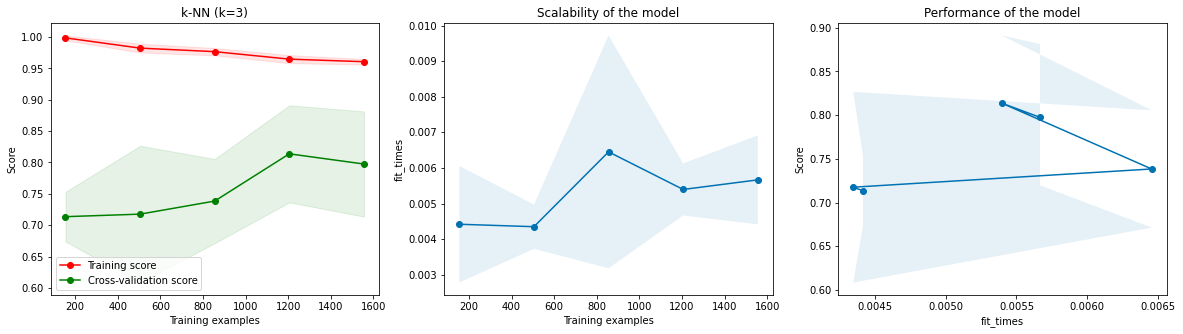

--------------------------------------------------
K =  5
F1 Score:  0.9241808923503039
Training Accuracy:  0.9826338639652678
Testing Accuracy:  0.9277456647398844
Confusion Matrix
[[237   5   0   0]
 [  8  69   0   0]
 [  0   8   6   0]
 [  0   4   0   9]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       242
           1       0.80      0.90      0.85        77
           2       1.00      0.43      0.60        14
           3       1.00      0.69      0.82        13

    accuracy                           0.93       346
   macro avg       0.94      0.75      0.81       346
weighted avg       0.93      0.93      0.92       346

Cross Validation Score
[0.84971098 0.74566474 0.77456647 0.73988439 0.83815029 0.82080925
 0.87283237 0.91907514 0.91860465 0.79651163]


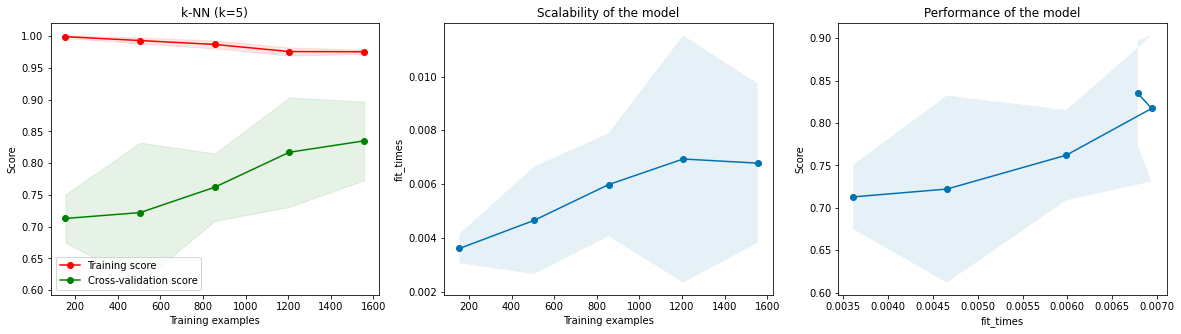

--------------------------------------------------
K =  7
F1 Score:  0.9133492280503883
Training Accuracy:  0.9768451519536903
Testing Accuracy:  0.9219653179190751
Confusion Matrix
[[240   2   0   0]
 [  8  69   0   0]
 [  2   6   5   1]
 [  0   6   2   5]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       242
           1       0.83      0.90      0.86        77
           2       0.71      0.36      0.48        14
           3       0.83      0.38      0.53        13

    accuracy                           0.92       346
   macro avg       0.83      0.66      0.71       346
weighted avg       0.92      0.92      0.91       346

Cross Validation Score
[0.83815029 0.75722543 0.73410405 0.75144509 0.87861272 0.84971098
 0.87283237 0.91907514 0.94186047 0.83139535]


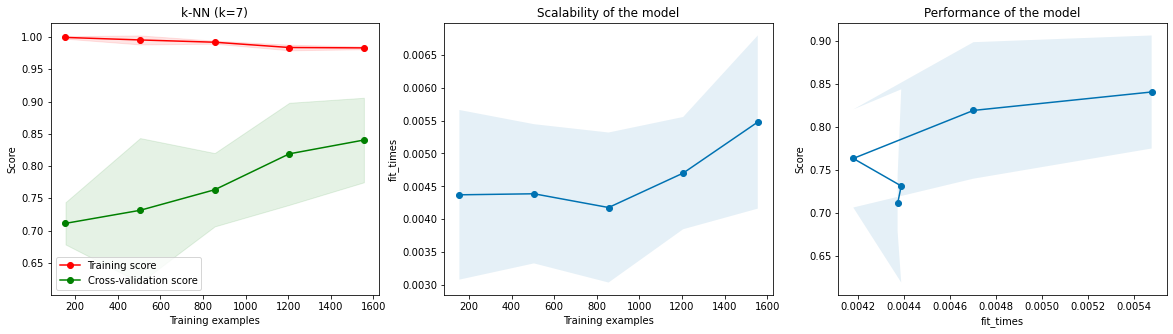

--------------------------------------------------
K =  9
F1 Score:  0.9149847237753065
Training Accuracy:  0.9696092619392185
Testing Accuracy:  0.9190751445086706
Confusion Matrix
[[236   6   0   0]
 [  8  69   0   0]
 [  0   7   7   0]
 [  0   7   0   6]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       242
           1       0.78      0.90      0.83        77
           2       1.00      0.50      0.67        14
           3       1.00      0.46      0.63        13

    accuracy                           0.92       346
   macro avg       0.94      0.71      0.78       346
weighted avg       0.93      0.92      0.91       346

Cross Validation Score
[0.85549133 0.78612717 0.74566474 0.76878613 0.84971098 0.8265896
 0.86127168 0.90751445 0.91860465 0.85465116]


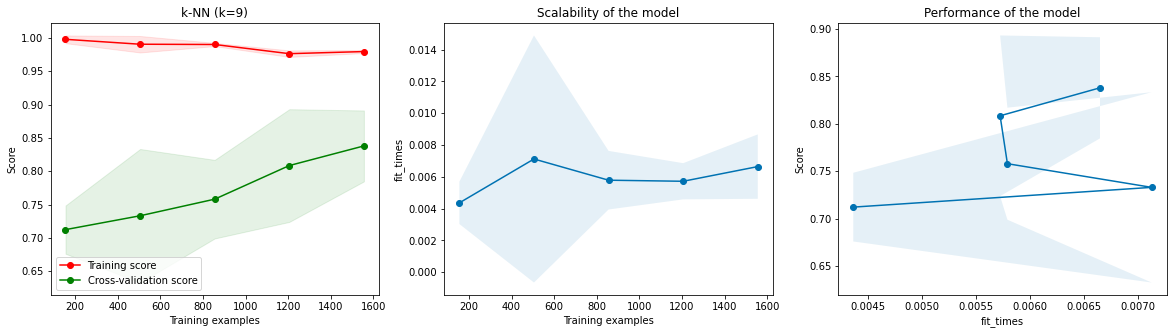

--------------------------------------------------


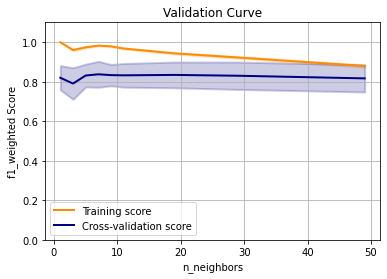

In [36]:
task = "k-NN"

from sklearn.neighbors import KNeighborsClassifier

f1 = []
train_acc = []
test_acc = []
params = [1, 3, 5, 7, 9]

for k in params:
    print("K = ", k)
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10)
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])

    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    plot_learning_curve(clf, f"{task} (k={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
    plt.show()
    print("--------------------------------------------------")
    
# Validation Curve
new_params = params + [11, 19, 29, 49]
plot_validation_curve(KNeighborsClassifier(), f"{task}: n_neighbors", x, y, "n_neighbors", new_params, scoring="f1_weighted", axes=None, cv=10, n_jobs=4)
plt.savefig(f'mental_plots/validation_curve_{task}.png')
plt.show()

--------------------------------------------------

In [ ]:
results